## Import Libraries

In [3]:
import pandas as pd
import numpy as np

from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve
)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

## Load Data & Split

In [4]:
df = pd.read_csv("../data/bank_cleaned.csv")
X = df.drop(columns=['deposit'])
y = df['deposit']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Baseline SVM (Before Tuning)

In [5]:
svm_baseline = SVC(kernel='rbf', probability=True, random_state=42)
svm_baseline.fit(X_train, y_train)

y_pred_baseline = svm_baseline.predict(X_test)
y_proba_baseline = svm_baseline.predict_proba(X_test)[:, 1]

baseline_results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_baseline),
    'Precision': precision_score(y_test, y_pred_baseline),
    'Recall': recall_score(y_test, y_pred_baseline),
    'F1-score': f1_score(y_test, y_pred_baseline),
    'AUC-ROC': roc_auc_score(y_test, y_proba_baseline)
}

print("🔹 Baseline SVM Performance:")
for k, v in baseline_results_svm.items():
    print(f"{k}: {v:.3f}")

🔹 Baseline SVM Performance:
Accuracy: 0.842
Precision: 0.812
Recall: 0.869
F1-score: 0.839
AUC-ROC: 0.909


## Parameter Grid for SVM

In [6]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'poly']
}

## Run Grid Search

In [7]:
svm_grid = GridSearchCV(
    SVC(probability=True, random_state=42),
    param_grid_svm,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

svm_grid.fit(X_train, y_train)

print("✅ Best SVM Parameters Found:")
print(svm_grid.best_params_)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   4.8s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   5.9s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   6.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.5s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   6.7s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.3s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   5.2s
[CV] END ......................C=0.1, gamma=auto, kernel=rbf; total time=   6.3s
[CV] END ......................C=0.1, gamma=aut

## Evaluate Tuned SVM

In [8]:
best_svm = svm_grid.best_estimator_

y_pred_tuned = best_svm.predict(X_test)
y_proba_tuned = best_svm.predict_proba(X_test)[:, 1]

tuned_results_svm = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned),
    'Precision': precision_score(y_test, y_pred_tuned),
    'Recall': recall_score(y_test, y_pred_tuned),
    'F1-score': f1_score(y_test, y_pred_tuned),
    'AUC-ROC': roc_auc_score(y_test, y_proba_tuned)
}

print("\n🔹 Tuned SVM Performance:")
for k, v in tuned_results_svm.items():
    print(f"{k}: {v:.3f}")


🔹 Tuned SVM Performance:
Accuracy: 0.839
Precision: 0.810
Recall: 0.861
F1-score: 0.835
AUC-ROC: 0.912


## Confusion Matrix (Before vs After)

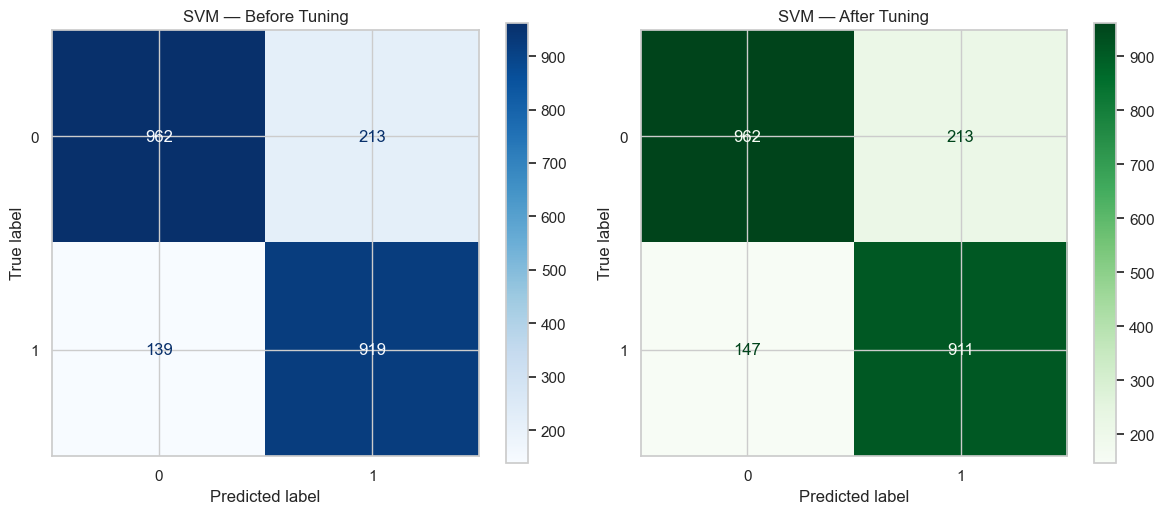

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_estimator(svm_baseline, X_test, y_test, ax=axes[0], cmap='Blues')
axes[0].set_title("SVM — Before Tuning")

ConfusionMatrixDisplay.from_estimator(best_svm, X_test, y_test, ax=axes[1], cmap='Greens')
axes[1].set_title("SVM — After Tuning")

plt.tight_layout()
plt.show()

## Comparison Table

In [11]:
svm_comparison = pd.DataFrame(
    [baseline_results_svm, tuned_results_svm],
    index=['Before Tuning', 'After Tuning']
)

svm_comparison

,Accuracy,Precision,Recall,F1-score,AUC-ROC
Before Tuning,0.842365,0.811837,0.868620,0.839269,0.908607
After Tuning,0.838782,0.810498,0.861059,0.835014,0.911705
